<font size='4'><b>Problem statement:</b> By capitalising on your Human Resources behavioral understanding, extract features from HR Analytics data set. Perform it in the context of Attrition prediction as the end goal.</font> 

<br/><br/>

In [1]:
# Importing libraries.
import wget
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Filtering warnings.
import warnings
warnings.filterwarnings('ignore')

In [3]:
file_name  = "HR_Analytics.csv.csv"
zenodo_url = "https://zenodo.org/record/4088439/files/"

In [4]:
# Downloading the file HR_Analytics.csv from Zenodo.
wget.download(zenodo_url + file_name, "./Assets/" + file_name)

'./Assets/HR_Analytics.csv (1).csv'

In [5]:
# Loading the downloaded file into dataframe.
df = pd.read_csv("./Assets/HR_Analytics.csv.csv")

In [6]:
# A bird's eye view on the dataframe.
df.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0


In [33]:
df.shape

(1470, 35)

In [7]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [8]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [9]:
for i in df.columns:
    print(i)
    print(df[i].value_counts())
    print("-"*55)

Age
35    78
34    77
31    69
36    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
46    33
44    33
43    32
50    30
24    26
25    26
47    24
49    24
55    22
48    19
51    19
53    19
52    18
54    18
22    16
56    14
58    14
23    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64
-------------------------------------------------------
Attrition
No     1233
Yes     237
Name: Attrition, dtype: int64
-------------------------------------------------------
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
-------------------------------------------------------
DailyRate
691     6
1082    5
329     5
1329    5
530     5
       ..
897     1
891     1
889     1
888     1
102     1
Name: DailyRate, Length: 886, dtype: int64
-------------------------------------------------------
Depart

#### Features : EmployeeCount, EmployeeNumber, Over18 and StandardHours have no variation(information) and serve no purpose. 

In [22]:
df.shape

(1470, 31)

In [23]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

#### Features : RelationshipSatisfaction, JobSatisfaction, EnvironmentSatisfaction, JobInvolvement and WorkLifeBalance have same range and same general meaning, so can be combined into a single feature.

In [12]:
df[['RelationshipSatisfaction','JobSatisfaction','EnvironmentSatisfaction','JobInvolvement','WorkLifeBalance']].head(3)

,RelationshipSatisfaction,JobSatisfaction,EnvironmentSatisfaction,JobInvolvement,WorkLifeBalance
0,1,4,2,3,1
1,4,2,3,2,3
2,2,3,4,2,3


In [13]:
df['EffectiveSatisfaction']= (df['RelationshipSatisfaction']+df['JobSatisfaction']+df['EnvironmentSatisfaction']+df['JobInvolvement']+df['WorkLifeBalance'])/5
def satisfaction(df):
    if(df['EffectiveSatisfaction']>2.4):
        return 1
    else:
        return 0
df['Satisfaction']=df.apply(lambda x:satisfaction(x),axis=1)
    

In [33]:
df['Satisfaction'].head(3)

0    0
1    1
2    1
Name: Satisfaction, dtype: int64

In [14]:
df['JobSatisfaction_mean']=(df['JobSatisfaction']+df['JobInvolvement'])/2

In [15]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'EffectiveSatisfaction', 'Satisfaction', 'JobSatisfaction_mean'],
      dtype='object')

#### If an employee had worked for more companies (say 4), we can consider the one as 'moving person'.

In [16]:
def MovingPeople(df):
    if(df['NumCompaniesWorked']>4):
        return 1
    else:
        return 0
df['MovingPeople']=df.apply(lambda x:MovingPeople(x),axis=1)
    

In [17]:
df.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,EffectiveSatisfaction,Satisfaction,JobSatisfaction_mean,MovingPeople
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,0,1,6,4,0,5,2.2,0,3.5,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,3,3,10,7,1,7,2.8,1,2.0,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,3,0,0,0,0,2.8,1,2.5,1


####  If employees'  distance from office to home is more (say 11 kms), we can consider them as 'Long distance' employees.

In [18]:
def LongDistance(df):
    if(df['DistanceFromHome']>11):
        return 1
    else:
        return 0
df['LongDistance']=df.apply(lambda x:LongDistance(x),axis=1)

In [19]:
df.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,EffectiveSatisfaction,Satisfaction,JobSatisfaction_mean,MovingPeople,LongDistance
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,1,6,4,0,5,2.2,0,3.5,1,0
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,3,10,7,1,7,2.8,1,2.0,0,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,0,0,0,0,2.8,1,2.5,1,0


#### It is possible that even after travelling long distance one can enjoy good work life balance because of less traffic, good mode of travelling, socialising while travelling, enjoyment in travelling etc. For those category employees creating another feature.

In [33]:
def LongDistWL1(df):
    if(df['DistanceFromHome']>11 and df['WorkLifeBalance']==1):
        return 1
    else:
        return 0
df['LongDistWL1']=df.apply(lambda x:LongDistWL1(x),axis=1)

In [34]:
df.shape

(1470, 41)

#### Since salary and age (experience) are related creating a feature for employees who are young and less paid (say  3000). We can also determine the less paid group for specific range of age by varying the threshold (salary).

In [35]:
def YoungAndBadPaid(df):
    if df['Age']>23 and df['Age']<32 and df['MonthlyIncome']<3000:
        return 1
    else:
        return 0
df['YoungAndBadPaid']=df.apply(lambda x:YoungAndBadPaid(x),axis=1)

In [36]:
df.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,EffectiveSatisfaction,Satisfaction,JobSatisfaction_mean,MovingPeople,LongDistance,LongDistWL1,YoungAndBadPaid,MiddleTraining,ShortDistNotSingle,LongDistNotEngaged
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,2.2,0,3.5,1,0,0,0,0,0,0
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,2.8,1,2.0,0,0,0,0,0,0,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,2.8,1,2.5,1,0,0,0,0,0,0


#### If an employee is not getting enough training (say 2) or getting too much training (say 7), the one will leave the company. For doing the tradeoff creating a feature called ' Middle training '.

In [37]:
def MiddleTraining(df):
    if df['TrainingTimesLastYear']<=3 and df['TrainingTimesLastYear']>=6:
        return 1
    else:
        return 0
df['MiddleTraining']=df.apply(lambda x:MiddleTraining(x),axis=1)

In [38]:
df.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,EffectiveSatisfaction,Satisfaction,JobSatisfaction_mean,MovingPeople,LongDistance,LongDistWL1,YoungAndBadPaid,MiddleTraining,ShortDistNotSingle,LongDistNotEngaged
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,2.2,0,3.5,1,0,0,0,0,0,0
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,2.8,1,2.0,0,0,0,0,0,0,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,2.8,1,2.5,1,0,0,0,0,0,0


#### Married employees with short distance from office to home (say 5 kms) are likely to stay in the same company.

In [39]:
def ShortDistNotSingle(df):
    if df['MaritalStatus']!='Single' and df['DistanceFromHome']<=6:
        return 1
    else:
        return 0
df['ShortDistNotSingle']=df.apply(lambda x:ShortDistNotSingle(x),axis=1)

In [40]:
df.shape

(1470, 41)

#### Never Engaged employees are more likely to tolerate long distance than other categories. 

In [41]:
def LongDistNotEngaged(df):
    if df['Age']<23 and df['DistanceFromHome']>11:
        return 1
    else:
        return 0
df['LongDistNotEngaged']=df.apply(lambda x:LongDistNotEngaged(x),axis=1)

In [42]:
df.shape

(1470, 41)

In [61]:
df['Stability']= df['YearsInCurrentRole']/df['YearsAtCompany']
df['Stability'].fillna(df['Stability'].mean(), inplace=True)

In [62]:
df.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,MovingPeople,LongDistance,LongDistWL1,YoungAndBadPaid,MiddleTraining,ShortDistNotSingle,LongDistNotEngaged,TimeInEachCompany,Stability,IncomeDistance
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,1,0,0,0,0,0,0,2.500000,0.666667,5993.00
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,0,0,0,0,0,0,0,28.000000,0.700000,641.25
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,1,0,0,0,0,0,0,2.666667,0.596061,1045.00


#### Creating a feature combining both income and distance factors which prima facie seem very important features for deriving an end solution.

In [56]:
df['IncomeDistance']= df['MonthlyIncome']/df['DistanceFromHome']

In [58]:
df.shape

(1470, 45)

#### Here, though inversing hardly impacts our model, creating a feature to put it straightforward.

In [64]:
df['Fidelity']=1/df['TimeInEachCompany'].replace(np.Inf,0)

In [65]:
df.shape

(1470, 46)

In [44]:
numeric_df= df.select_dtypes(include=[np.number])

categoric_df=df.select_dtypes(exclude=[np.number])

In [45]:
numericcol=numeric_df.columns.tolist()


categorycol=categoric_df.columns.tolist()

print ("Category :",categorycol)


print ("\n Numeric :",numericcol)


Category : ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']

 Numeric : ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'EffectiveSatisfaction', 'Satisfaction', 'JobSatisfaction_mean', 'MovingPeople', 'LongDistance', 'LongDistWL1', 'YoungAndBadPaid', 'MiddleTraining', 'ShortDistNotSingle', 'LongDistNotEngaged', 'Stability']


In [46]:
df.shape

(1470, 42)

In [48]:
df=df.drop(['DailyRate','MonthlyRate', 'DistanceFromHome', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',  'JobSatisfaction',  'NumCompaniesWorked', 'RelationshipSatisfaction', 'TrainingTimesLastYear'],axis=1)

In [49]:
df.shape

(1470, 32)

#### Converting categorical to numerical features.

In [50]:
data = pd.get_dummies(df, columns=categorycol, drop_first=True)
data.shape

(1470, 46)

In [52]:
data.head(3)

,Age,Education,JobLevel,MonthlyIncome,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,2,2,5993,11,3,0,8,1,6,...,0,0,0,0,0,1,0,0,1,1
1,49,1,2,5130,23,4,1,10,3,10,...,0,0,0,0,1,0,0,1,0,0
2,37,2,1,2090,15,3,0,7,3,0,...,1,0,0,0,0,0,0,0,1,1


#### Converting everything into numerical.

In [53]:
for i in data.columns:
    data[i]=data[i].astype(int)

data.shape

(1470, 46)

#### Checking for correlations.

In [54]:
corr=data.corr()
corr

,Age,Education,JobLevel,MonthlyIncome,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
Age,1.000000,0.208034,0.509604,0.497855,0.003634,0.001904,0.037510,0.680381,-0.021490,0.311309,...,-0.143176,0.294248,0.049726,0.185891,-0.146518,-0.002001,-0.175785,0.083919,-0.119185,0.028062
Education,0.208034,1.000000,0.101589,0.094961,-0.011111,-0.024539,0.018422,0.148280,0.009819,0.069114,...,-0.063566,0.028453,-0.005290,0.049694,0.000709,0.053398,-0.091465,-0.001865,0.004168,-0.020322
JobLevel,0.509604,0.101589,1.000000,0.950300,-0.034730,-0.021222,0.013984,0.782208,0.037818,0.534739,...,-0.344608,0.552744,0.114896,0.414319,-0.387788,0.127490,-0.216559,0.050547,-0.087072,0.000544
MonthlyIncome,0.497855,0.094961,0.950300,1.000000,-0.027269,-0.017120,0.005408,0.772893,0.030683,0.514285,...,-0.320906,0.619573,0.055684,0.485818,-0.345180,0.047792,-0.201514,0.056767,-0.089361,0.006089
PercentSalaryHike,0.003634,-0.011111,-0.034730,-0.027269,1.000000,0.773550,0.007528,-0.020608,-0.003280,-0.035991,...,-0.020628,-0.005394,0.034682,-0.017017,0.032537,-0.046683,0.031102,0.020895,-0.001386,-0.005433
PerformanceRating,0.001904,-0.024539,-0.021222,-0.017120,0.773550,1.000000,0.003506,0.006744,0.002572,0.003435,...,0.010796,0.032050,0.029775,-0.035744,0.019416,-0.041401,-0.006214,0.009585,-0.001045,0.004369
StockOptionLevel,0.037510,0.018422,0.013984,0.005408,0.007528,0.003506,1.000000,0.010136,0.004129,0.015058,...,0.013386,-0.015637,0.007735,0.015807,-0.011635,0.015756,-0.048067,0.225574,-0.638957,-0.000449
TotalWorkingYears,0.680381,0.148280,0.782208,0.772893,-0.020608,0.006744,0.010136,1.000000,0.001008,0.628133,...,-0.215426,0.465837,0.064077,0.312148,-0.228119,-0.012241,-0.207726,0.053512,-0.089529,0.012754
WorkLifeBalance,-0.021490,0.009819,0.037818,0.030683,-0.003280,0.002572,0.004129,0.001008,1.000000,0.012089,...,-0.028209,0.005137,0.002011,0.034403,-0.058613,0.032092,0.045148,-0.006388,0.014921,-0.027092
YearsAtCompany,0.311309,0.069114,0.534739,0.514285,-0.035991,0.003435,0.015058,0.628133,0.012089,1.000000,...,-0.150181,0.330965,0.031968,0.153918,-0.154062,0.042602,-0.163464,0.044925,-0.070935,-0.011687


#### Generating Heat map.

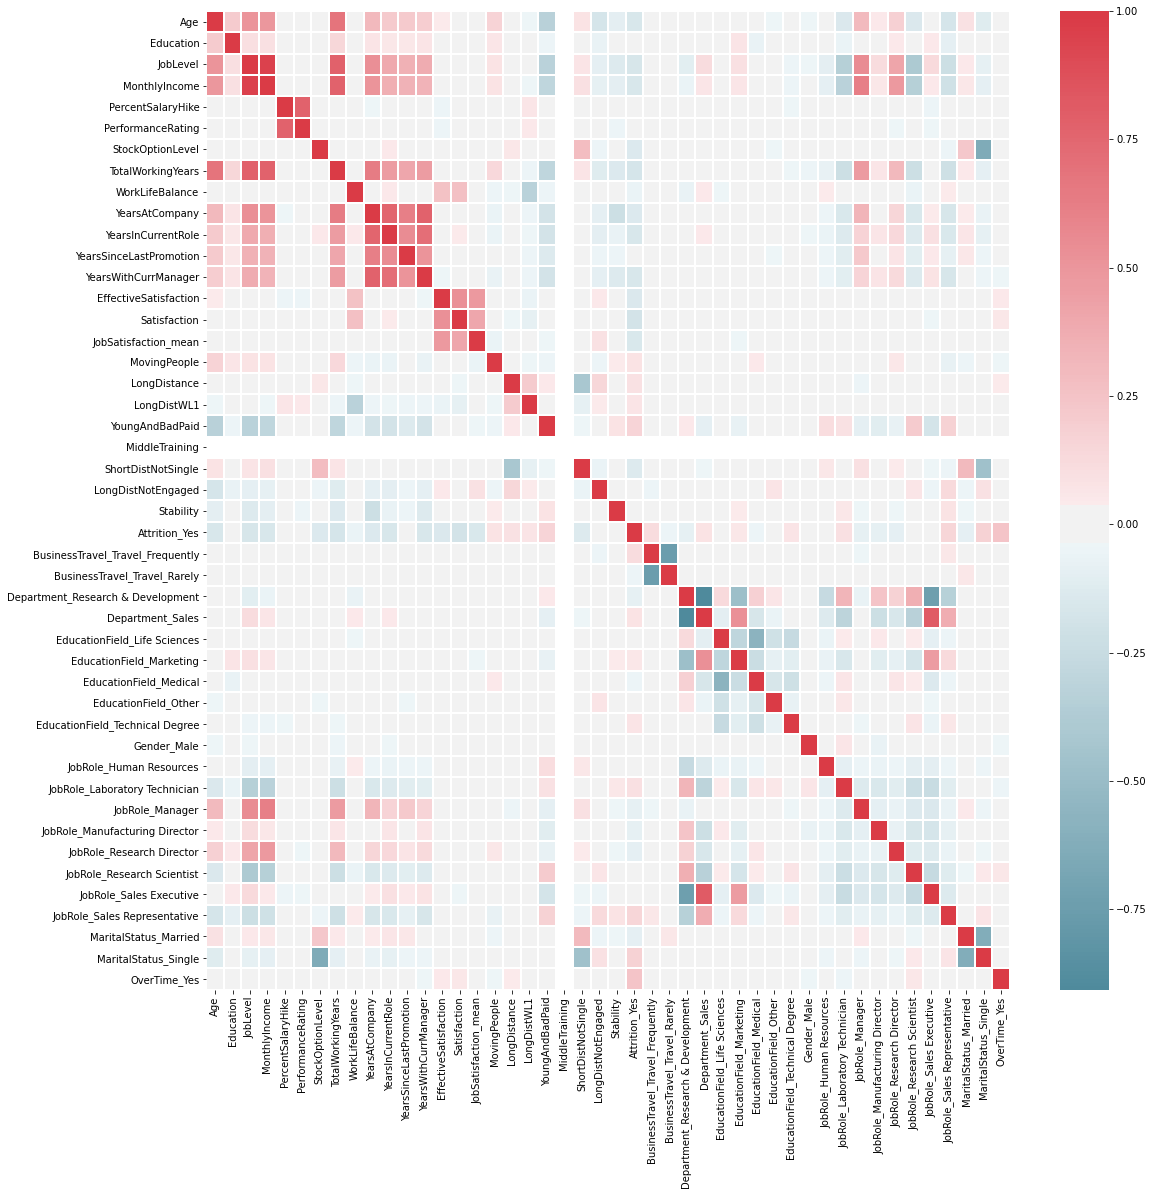

In [55]:
f, ax = plt.subplots(figsize=(18, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
heatmap = sns.heatmap(corr,cmap=cmap, center=0.0,vmax = 1, linewidths=1, ax=ax)
plt.show()

In [56]:
data.columns

Index(['Age', 'Education', 'JobLevel', 'MonthlyIncome', 'PercentSalaryHike',
       'PerformanceRating', 'StockOptionLevel', 'TotalWorkingYears',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'EffectiveSatisfaction', 'Satisfaction', 'JobSatisfaction_mean',
       'MovingPeople', 'LongDistance', 'LongDistWL1', 'YoungAndBadPaid',
       'MiddleTraining', 'ShortDistNotSingle', 'LongDistNotEngaged',
       'Stability', 'Attrition_Yes', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Male', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
   

In [57]:
data.shape

(1470, 46)

In [59]:
data=data.drop(['Education','PercentSalaryHike','PerformanceRating','YearsSinceLastPromotion','Stability','EducationField_Life Sciences','EducationField_Other','Gender_Male','JobRole_Human Resources','JobRole_Research Scientist','JobRole_Sales Executive'],axis=1)

In [60]:
data.shape

(1470, 35)

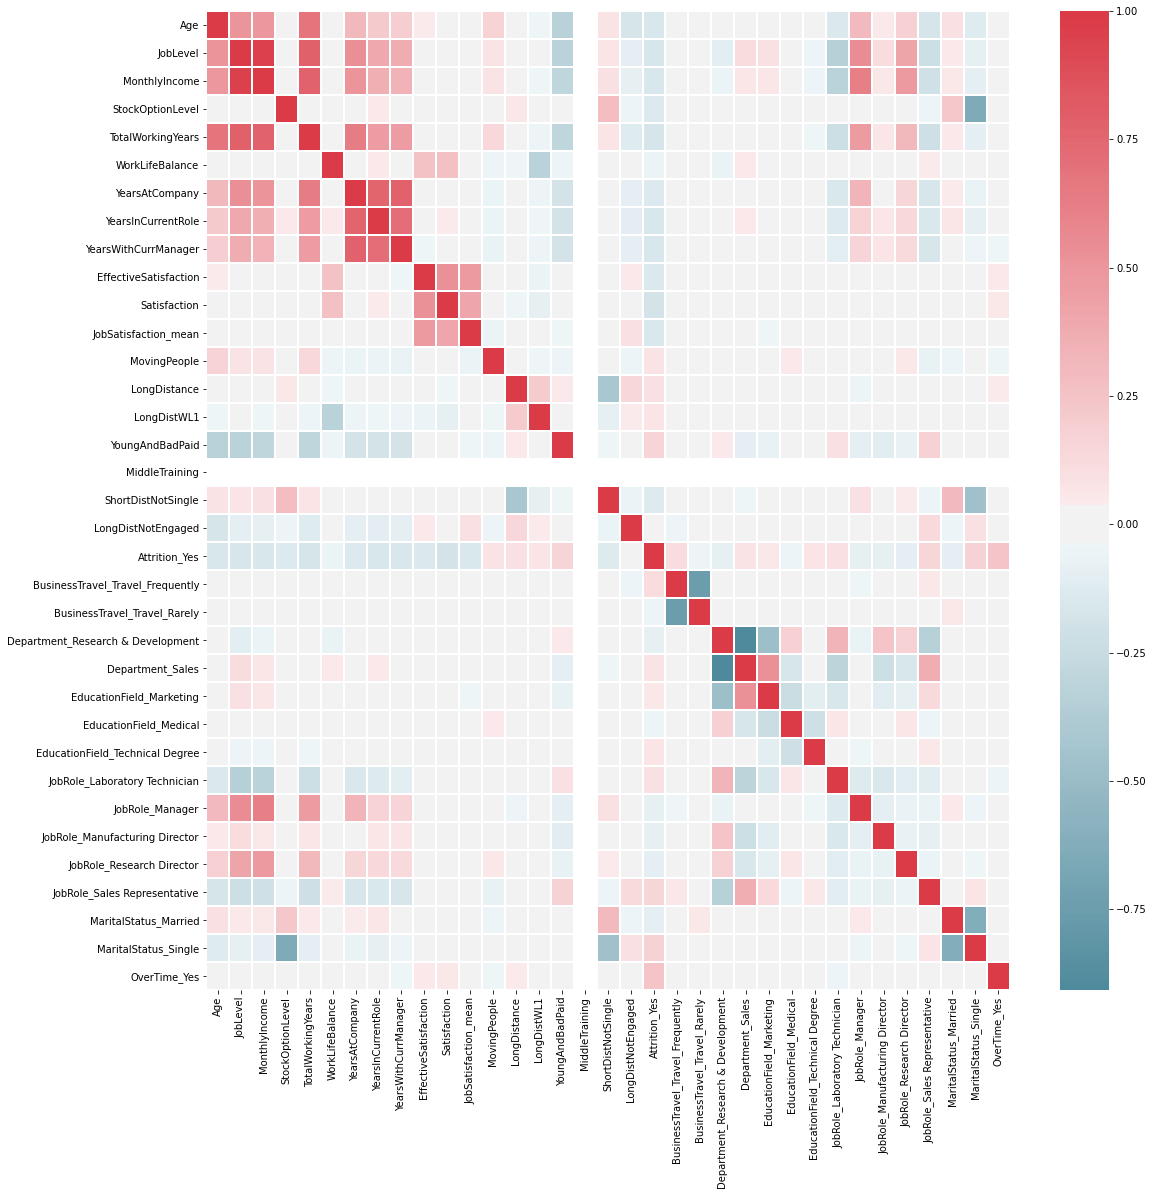

In [61]:
corr = data.corr()
f, ax = plt.subplots(figsize=(18, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
heatmap = sns.heatmap(corr,cmap=cmap, center=0.0,vmax = 1, linewidths=1, ax=ax)
plt.show()

In [85]:
data=data.drop('Attrition_Yes',axis=1)

#### Standardising.

In [65]:
scalar = StandardScaler()
data_scaled = scalar.fit_transform(data)
data_scaled = pd.DataFrame(data_scaled,columns=data.columns)
data_scaled.head(3)

,Age,JobLevel,MonthlyIncome,StockOptionLevel,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,EffectiveSatisfaction,...,EducationField_Medical,EducationField_Technical Degree,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,0.446350,-0.057788,-0.108350,-0.932014,-0.421642,-2.493820,-0.164613,-0.063296,0.245834,-0.614481,...,-0.679141,-0.314093,-0.462464,-0.273059,-0.330808,-0.239904,-0.244625,-0.918921,1.458650,1.591746
1,1.322365,-0.057788,-0.291719,0.241988,-0.164511,0.338096,0.488508,0.764998,0.806541,-0.614481,...,-0.679141,-0.314093,-0.462464,-0.273059,-0.330808,-0.239904,-0.244625,1.088232,-0.685565,-0.628241
2,0.008343,-0.961486,-0.937654,-0.932014,-0.550208,0.338096,-1.144294,-1.167687,-1.155935,-0.614481,...,-0.679141,-0.314093,2.162331,-0.273059,-0.330808,-0.239904,-0.244625,-0.918921,1.458650,1.591746


#### Outliers handling.

In [70]:
data_scaled.dropna()
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(data_scaled.values, i) for i in range(data_scaled.shape[1])]
vif["features"] = data_scaled.columns
vif

,VIF Factor,features
0,2.139634,Age
1,13.196545,JobLevel
2,17.830187,MonthlyIncome
3,1.893239,StockOptionLevel
4,4.775398,TotalWorkingYears
5,1.312448,WorkLifeBalance
6,4.213914,YearsAtCompany
7,2.720260,YearsInCurrentRole
8,2.843493,YearsWithCurrManager
9,1.686214,EffectiveSatisfaction


#### Dimensionality reduction

Text(0.5, 1.0, 'Explained Variance')

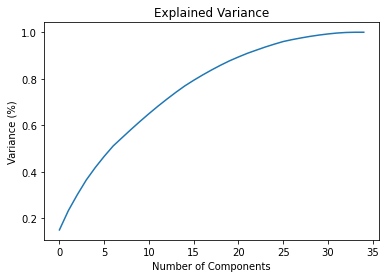

In [73]:
pca = PCA()
principalComponents = pca.fit_transform(data_scaled)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')


In [74]:
pca = PCA(n_components=22)
new_data = pca.fit_transform(data_scaled)

In [83]:
data_pca = pd.DataFrame(new_data,columns=[  f"column{i}" for i in range (22)])

In [84]:
data_pca.head(3)

,column0,column1,column2,column3,column4,column5,column6,column7,column8,column9,...,column12,column13,column14,column15,column16,column17,column18,column19,column20,column21
0,-0.565686,2.181096,2.009209,1.628004,-1.194195,0.688728,0.332275,0.678953,0.050299,-1.415026,...,1.939821,-0.210129,1.267651,0.473883,-0.203263,-0.964230,-1.455431,1.006307,1.125259,0.361462
1,0.874144,-0.808674,-0.280936,0.118219,2.790328,0.261069,-0.200263,-0.111615,0.656887,-0.108370,...,-0.255624,0.361930,-0.348140,-0.410646,-0.687984,-0.211639,-0.083381,-1.279954,0.222012,0.474900
2,-2.818038,-0.697555,2.005084,0.311711,-1.457888,1.350756,-0.729571,1.072138,-0.882730,-0.716257,...,0.211858,0.893404,0.832893,0.230692,-0.444607,0.379251,0.801570,-0.163149,0.737859,-0.596030


#### Checking the class balance.

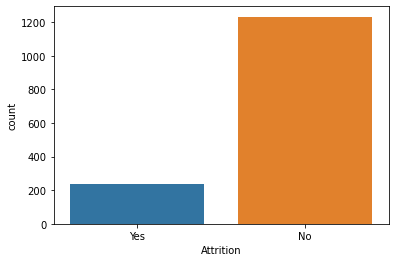

In [86]:
sns.countplot(df['Attrition'])

<br/><br/>

<font size='4'><b>Way forward:</b> As we progress in our data science journey we tend to notice that it is not the model but rather the data we feed to it decide the success of a solution. From a practitioner's point of view, with the emergence of automation and plethora of libraries which can build models for you even if you don't know underlying nitty gritty details, feature engineering is one of the areas where you can be an invaluable asset to your Enterprise. Since data science is an iterative process, we always have the option to transform the features in a better way based on model's performance.</font> 